In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
temperatures = pd.read_csv('./daily-minimum-temperatures-in-me.csv')
electricity = pd.read_csv('./Electric_Production.csv')

In [3]:
temperatures

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
...,...,...
3645,12/27/1990,14
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7


In [4]:
electricity

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [5]:
df = pd.DataFrame()
df['date'] = pd.to_datetime(electricity['DATE'], format='%m/%d/%Y')
df

,date
0,1985-01-01
1,1985-02-01
2,1985-03-01
3,1985-04-01
4,1985-05-01
...,...
392,2017-09-01
393,2017-10-01
394,2017-11-01
395,2017-12-01


In [6]:
df.shape

(397, 1)

In [20]:
df['temperature'] = temperatures['Daily minimum temperatures'][:df.shape[0]]
df['temperature'] = pd.to_numeric(df['temperature'])

In [9]:
df['electricity'] = electricity['IPG2211A2N'][:df.shape[0]]

In [21]:
df

,date,temperature,electricity,ty
0,1985-01-01,20.7,72.5052,17.9
1,1985-02-01,17.9,70.6720,18.8
2,1985-03-01,18.8,62.4502,14.6
3,1985-04-01,14.6,57.4714,15.8
4,1985-05-01,15.8,55.3151,15.8
...,...,...,...,...
392,2017-09-01,12.5,98.6154,17
393,2017-10-01,17.0,93.6137,17.1
394,2017-11-01,17.1,97.3359,14
395,2017-12-01,14.0,114.7212,14.6


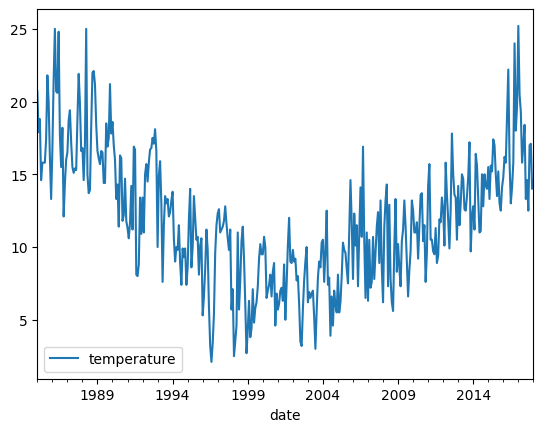

In [22]:
df.plot(kind='line', x='date', y='temperature')
plt.show()

Text(0, 0.5, 'Electricité')

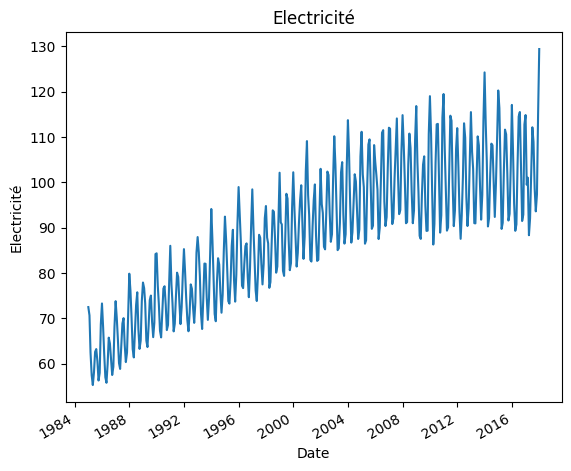

In [15]:
plt.plot(df.date, df.electricity)
plt.title('Electricité')
plt.xticks(rotation=30, ha="right")
plt.xlabel('Date')
plt.ylabel('Electricité')

In [23]:
df['ty'] = df['temperature'].shift(-1)
df

,date,temperature,electricity,ty
0,1985-01-01,20.7,72.5052,17.9
1,1985-02-01,17.9,70.6720,18.8
2,1985-03-01,18.8,62.4502,14.6
3,1985-04-01,14.6,57.4714,15.8
4,1985-05-01,15.8,55.3151,15.8
...,...,...,...,...
392,2017-09-01,12.5,98.6154,17.0
393,2017-10-01,17.0,93.6137,17.1
394,2017-11-01,17.1,97.3359,14.0
395,2017-12-01,14.0,114.7212,14.6


In [26]:
df['ey'] = df['electricity'].shift(-1)
df

,date,temperature,electricity,ty,ey
0,1985-01-01,20.7,72.5052,17.9,70.6720
1,1985-02-01,17.9,70.6720,18.8,62.4502
2,1985-03-01,18.8,62.4502,14.6,57.4714
3,1985-04-01,14.6,57.4714,15.8,55.3151
4,1985-05-01,15.8,55.3151,15.8,58.0904
...,...,...,...,...,...
392,2017-09-01,12.5,98.6154,17.0,93.6137
393,2017-10-01,17.0,93.6137,17.1,97.3359
394,2017-11-01,17.1,97.3359,14.0,114.7212
395,2017-12-01,14.0,114.7212,14.6,129.4048


In [27]:
train = df[:300]
test = df[300:]

test = test.drop(test.tail(1).index)

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

In [38]:
X_train = train[['temperature', 'electricity']].values.reshape(-1, 2)
X_train

array([[ 20.7   ,  72.5052],
       [ 17.9   ,  70.672 ],
       [ 18.8   ,  62.4502],
       [ 14.6   ,  57.4714],
       [ 15.8   ,  55.3151],
       [ 15.8   ,  58.0904],
       [ 15.8   ,  62.6202],
       [ 17.4   ,  63.2485],
       [ 21.8   ,  60.5846],
       [ 20.    ,  56.3154],
       [ 16.2   ,  58.0005],
       [ 13.3   ,  68.7145],
       [ 16.7   ,  73.3057],
       [ 21.5   ,  67.9869],
       [ 25.    ,  62.2221],
       [ 20.7   ,  57.0329],
       [ 20.6   ,  55.8137],
       [ 24.8   ,  59.9005],
       [ 17.7   ,  65.7655],
       [ 15.5   ,  64.4816],
       [ 18.2   ,  61.0005],
       [ 12.1   ,  57.5322],
       [ 14.4   ,  59.3417],
       [ 16.    ,  68.1354],
       [ 16.5   ,  73.8152],
       [ 18.7   ,  70.062 ],
       [ 19.4   ,  65.61  ],
       [ 17.2   ,  60.1586],
       [ 15.5   ,  58.8734],
       [ 15.1   ,  63.8918],
       [ 15.4   ,  68.8694],
       [ 15.3   ,  70.0669],
       [ 18.8   ,  64.1151],
       [ 21.9   ,  60.3789],
       [ 19.9 

In [40]:
y_train = train[['ty', 'ey']].values.reshape(-1, 2)
y_train

array([[ 17.9   ,  70.672 ],
       [ 18.8   ,  62.4502],
       [ 14.6   ,  57.4714],
       [ 15.8   ,  55.3151],
       [ 15.8   ,  58.0904],
       [ 15.8   ,  62.6202],
       [ 17.4   ,  63.2485],
       [ 21.8   ,  60.5846],
       [ 20.    ,  56.3154],
       [ 16.2   ,  58.0005],
       [ 13.3   ,  68.7145],
       [ 16.7   ,  73.3057],
       [ 21.5   ,  67.9869],
       [ 25.    ,  62.2221],
       [ 20.7   ,  57.0329],
       [ 20.6   ,  55.8137],
       [ 24.8   ,  59.9005],
       [ 17.7   ,  65.7655],
       [ 15.5   ,  64.4816],
       [ 18.2   ,  61.0005],
       [ 12.1   ,  57.5322],
       [ 14.4   ,  59.3417],
       [ 16.    ,  68.1354],
       [ 16.5   ,  73.8152],
       [ 18.7   ,  70.062 ],
       [ 19.4   ,  65.61  ],
       [ 17.2   ,  60.1586],
       [ 15.5   ,  58.8734],
       [ 15.1   ,  63.8918],
       [ 15.4   ,  68.8694],
       [ 15.3   ,  70.0669],
       [ 18.8   ,  64.1151],
       [ 21.9   ,  60.3789],
       [ 19.9   ,  62.4643],
       [ 16.6 

In [41]:
X_test = test[['temperature', 'electricity']].values.reshape(-1, 2)
X_test

array([[ 12.5   , 119.0166],
       [ 11.    , 110.533 ],
       [ 11.    ,  98.2672],
       [ 11.7   ,  86.3   ],
       [  9.2   ,  90.8364],
       [ 11.5   , 104.3538],
       [ 13.6   , 112.8066],
       [ 13.7   , 112.9014],
       [ 10.4   , 100.1209],
       [ 11.5   ,  88.9251],
       [  7.6   ,  92.775 ],
       [  9.6   , 114.3266],
       [ 14.2   , 119.488 ],
       [ 15.7   , 107.3753],
       [ 10.5   ,  99.1028],
       [ 10.5   ,  89.3583],
       [  9.7   ,  90.0698],
       [  9.5   , 102.8204],
       [ 11.3   , 114.7068],
       [  8.9   , 113.5958],
       [  9.4   ,  99.4712],
       [ 11.9   ,  90.3566],
       [ 11.7   ,  93.8095],
       [ 13.4   , 107.3312],
       [ 12.6   , 111.9646],
       [ 10.1   , 103.3679],
       [ 15.8   ,  93.5772],
       [ 13.6   ,  87.5566],
       [ 11.9   ,  92.7603],
       [  9.9   , 101.14  ],
       [ 12.6   , 113.0357],
       [ 17.8   , 109.8601],
       [ 15.    ,  96.7431],
       [ 13.6   ,  90.3805],
       [ 13.4 

In [43]:
gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))

gbr.fit(X_train, y=y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=42))

In [44]:
gbr_pred = gbr.predict(X_test)
gbr_pred

array([[ 10.78526676, 103.39444932],
       [ 10.47141184, 105.72689382],
       [ 11.40018065,  93.35396417],
       [ 10.72616156,  85.44944495],
       [  8.68906173,  93.16758808],
       [  9.51494428, 102.55997305],
       [ 11.34902985, 112.11726518],
       [ 10.94886245, 112.11726518],
       [  9.6367257 ,  93.8976124 ],
       [ 11.03941674,  94.62461216],
       [  9.89397281,  87.83603782],
       [  9.47930276, 106.89712744],
       [ 10.34785964, 110.41114495],
       [ 11.15551572, 109.35125136],
       [  9.77468218,  92.57619904],
       [ 10.05615907,  93.94690323],
       [ 11.43577435,  95.60217568],
       [  9.5144222 , 102.5502578 ],
       [ 11.62073583, 103.88625663],
       [  8.12788425, 106.24068952],
       [  9.7111589 ,  97.32694536],
       [ 10.00696428,  93.17357524],
       [ 10.37949488,  93.62162471],
       [  9.94353028, 114.48753737],
       [ 11.09066509, 103.73347795],
       [  9.32596904, 103.62107783],
       [ 11.42070059,  95.39867988],
 

In [61]:
test['t_pred'] = gbr_pred[:, 0]
test['e_pred'] = gbr_pred[:, 1]
test

,date,temperature,electricity,ty,ey,t_pred,e_pred
300,2010-01-01,12.5,119.0166,11.0,110.5330,10.785267,103.394449
301,2010-02-01,11.0,110.5330,11.0,98.2672,10.471412,105.726894
302,2010-03-01,11.0,98.2672,11.7,86.3000,11.400181,93.353964
303,2010-04-01,11.7,86.3000,9.2,90.8364,10.726162,85.449445
304,2010-05-01,9.2,90.8364,11.5,104.3538,8.689062,93.167588
...,...,...,...,...,...,...,...
391,2017-08-01,14.6,108.9312,12.5,98.6154,11.942772,112.007300
392,2017-09-01,12.5,98.6154,17.0,93.6137,11.355536,91.773592
393,2017-10-01,17.0,93.6137,17.1,97.3359,11.515031,95.306338
394,2017-11-01,17.1,97.3359,14.0,114.7212,15.579086,93.020556


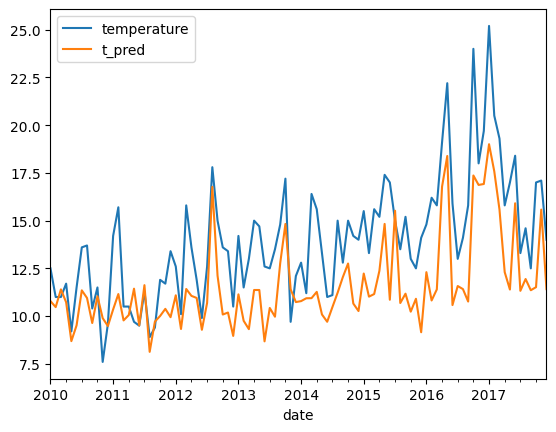

In [63]:
test.plot(kind='line', x='date', y=['temperature', 't_pred'])
plt.show()

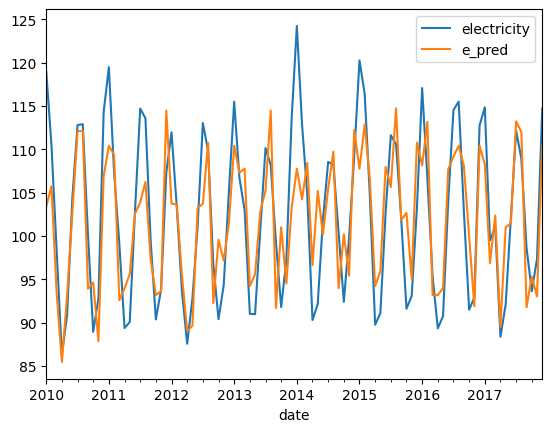

In [70]:
test.plot(kind='line', x='date', y=['electricity', 'e_pred'])
plt.show()

In [64]:
%%markdown

# Evaluation

[Mean absolute percentage error](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)


# Evaluation

[Mean absolute percentage error](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)


In [65]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)


In [68]:
gbr_mape = mape(test['temperature'], test['t_pred'])

x = ['Gradient Boosting']
y = [gbr_mape]

for i in range(len(x)):
    print('MAPE Temperature', x[i], y[i])


MAPE Temperature Gradient Boosting 17.36


In [69]:
gbr_mape = mape(test['electricity'], test['e_pred'])

x = ['Gradient Boosting']
y = [gbr_mape]

for i in range(len(x)):
    print('MAPE Electricité', x[i], y[i])

MAPE Electricité Gradient Boosting 4.66
